# Superstore Analysis

## Intro
A deep dive into the Superstore dataset!

## Goal
Management wants to find ways to increase overall profit.

## Data
US Superstore data (2014-2017)

https://www.kaggle.com/datasets/juhi1994/superstore

## Questions to Answer

1. Where is the bulk of our sales from? Revenue?
2. What caused an increase in sales in 2017?
3. What months can we target for more sales?
4. Are there any types of customers to target?

## Analysis
1. category, sub-category
2. certain products? category, sub-category? units? discounts?
3. busy vs slow months
4. Multiple order customers, consumer vs corporate customer, location of customer

## Dataset Info

In [1]:
import os
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter

path = os.getcwd()
df = pd.read_csv(path + '/Formatted - Superstore.csv',parse_dates=['Order Date','Ship Date'],infer_datetime_format=True)

In [2]:
df.shape

(9994, 23)

In [3]:
pd.set_option('display.max_columns', 23)

In [4]:
df.dtypes

Order ID                 object
Order Date       datetime64[ns]
Ship Date        datetime64[ns]
Ship Mode                object
Customer ID              object
Customer Name            object
Segment                  object
Country                  object
City                     object
State                    object
Postal Code               int64
Region                   object
Product ID               object
Category                 object
Sub-Category             object
Product Name             object
Sales                   float64
Quantity                  int64
Discount                float64
Profit                  float64
Year                      int64
Month                     int64
DOW                      object
dtype: object

In [5]:
df['Postal Code'] = df['Postal Code'].astype(str)

In [6]:
df.isna().sum()

Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
Year             0
Month            0
DOW              0
dtype: int64

In [7]:
df['Category'].value_counts()

Office Supplies    6026
Furniture          2121
Technology         1847
Name: Category, dtype: int64

In [8]:
df['Sub-Category'].value_counts()

Binders        1523
Paper          1370
Furnishings     957
Phones          889
Storage         846
Art             796
Accessories     775
Chairs          617
Appliances      466
Labels          364
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: Sub-Category, dtype: int64

In [9]:
df['Segment'].value_counts()

Consumer       5191
Corporate      3020
Home Office    1783
Name: Segment, dtype: int64

In [10]:
df['Product Name'].nunique()

1850

## 1. Bulk of Sales and Revenues

##### By Year & Category

In [11]:
df_year_cat = df.groupby(['Year','Category']).sum().drop(columns=['Month','Discount'])
df_year_cat['Year-Sales'] = df_year_cat.groupby(level=0)['Sales'].transform(np.sum)
df_year_cat['Year-Quantity'] = df_year_cat.groupby(level=0)['Quantity'].transform(np.sum)
df_year_cat['Year-Profit'] = df_year_cat.groupby(level=0)['Profit'].transform(np.sum)
df_year_cat.insert(3,'PctSalesOfYear',(df_year_cat['Sales']/df_year_cat['Year-Sales']))
df_year_cat.insert(4,'PctQtyOfYear',(df_year_cat['Quantity']/df_year_cat['Year-Quantity']))
df_year_cat.insert(5,'PctProfitOfYear',(df_year_cat['Profit']/df_year_cat['Year-Profit']))

In [22]:
df_year_cat

Sales  Quantity      Profit  PctSalesOfYear  \
Year Category                                                             
2014 Furniture        157192.8531      1623   5457.7255        0.324613   
     Office Supplies  151776.4120      4569  22593.4161        0.313427   
     Technology       175278.2330      1389  21492.8325        0.361960   
2015 Furniture        170518.2370      1775   3015.2029        0.362394   
     Office Supplies  137233.4630      4715  25099.5338        0.291656   
     Technology       162780.8090      1489  33503.8670        0.345950   
2016 Furniture        198901.4360      2193   6959.9531        0.326493   
     Office Supplies  183939.9820      5946  35061.2292        0.301934   
     Technology       226364.1800      1698  39773.9920        0.371573   
2017 Furniture        215387.2692      2437   3018.3913        0.293757   
     Office Supplies  246097.1750      7676  39736.6217        0.335641   
     Technology       271730.8110      2363  50684.2566        0.370602   

                      PctQtyOfYear  PctProfitOfYear   Year-Sales  \
Year Category                                                      
2014 Furniture            0.214088         0.110159  484247.4981   
     Office Supplies      0.602691         0.456028  484247.4981   
     Technology           0.183221         0.433813  484247.4981   
2015 Furniture            0.222459         0.048933  470532.5090   
     Office Supplies      0.590926         0.407337  470532.5090   
     Technology           0.186615         0.543730  470532.5090   
2016 Furniture            0.222934         0.085090  609205.5980   
     Office Supplies      0.604453         0.428647  609205.5980   
     Technology           0.172614         0.486263  609205.5980   
2017 Furniture            0.195335         0.032303  733215.2552   
     Office Supplies      0.615261         0.425267  733215.2552   
     Technology           0.189404         0.542430  733215.2552   

                      Year-Quantity  Year-Profit  
Year Category                                     
2014 Furniture                 7581   49543.9741  
     Office Supplies           7581   49543.9741  
     Technology                7581   49543.9741  
2015 Furniture                 7979   61618.6037  
     Office Supplies           7979   61618.6037  
     Technology                7979   61618.6037  
2016 Furniture                 9837   81795.1743  
     Office Supplies           9837   81795.1743  
     Technology                9837   81795.1743  
2017 Furniture                12476   93439.2696  
     Office Supplies          12476   93439.2696  
     Technology               12476   93439.2696

In [27]:
df_year_cat.loc[2014]['Sales']

Category
Furniture          157192.8531
Office Supplies    151776.4120
Technology         175278.2330
Name: Sales, dtype: float64

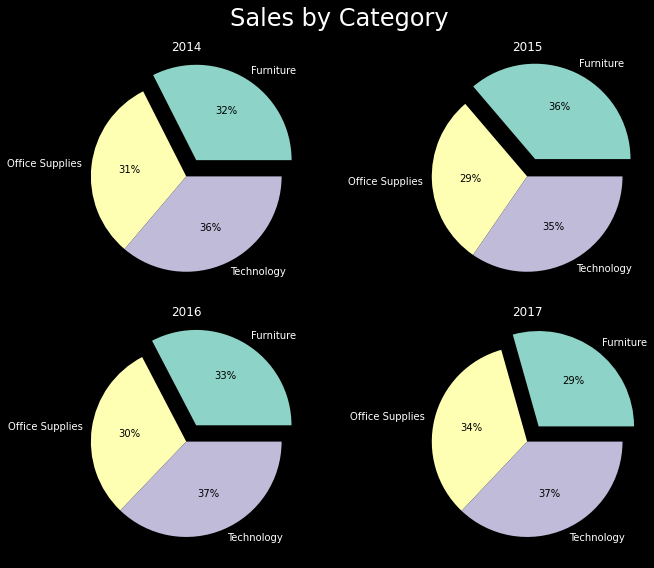

In [46]:
fig, [[ax1, ax2],[ax3,ax4]] = plt.subplots(2, 2, figsize=(10,8))

list_of_axes = [ax1,ax2,ax3,ax4]
year = [2014,2015,2016,2017]
category = ['Furniture','Office Supplies','Technology']
i = 0

for ax in list_of_axes:
    df_year_cat_pie = df_year_cat.loc[year[i]]
    x = df_year_cat_pie['Sales']
    myexplode = [0.2, 0, 0]
    _, _, autotexts = ax.pie(x,labels=category,explode=myexplode,autopct='%1.0f%%')
    for autotext in autotexts:
        autotext.set_color('black')
    ax.title.set_text(year[i])
    i = i+1

fig.suptitle('Sales by Category', fontsize=24)

fig.tight_layout()

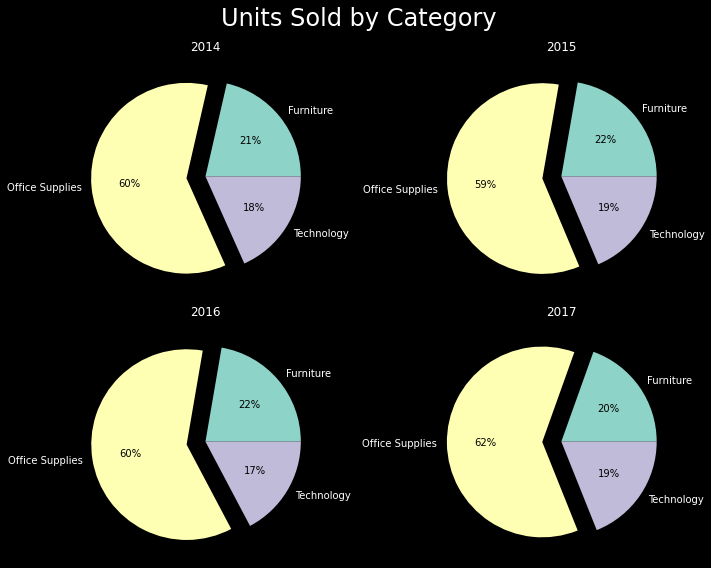

In [54]:
fig, [[ax1, ax2],[ax3,ax4]] = plt.subplots(2, 2, figsize=(10,8))

list_of_axes = [ax1,ax2,ax3,ax4]
year = [2014,2015,2016,2017]
category = ['Furniture','Office Supplies','Technology']
i = 0

for ax in list_of_axes:
    df_year_cat_pie = df_year_cat.loc[year[i]]
    x = df_year_cat_pie['Quantity']
    myexplode = [0, 0.2, 0]
    _, _, autotexts = ax.pie(x,labels=category,explode=myexplode,autopct='%1.0f%%')
    for autotext in autotexts:
        autotext.set_color('black')
    ax.title.set_text(year[i])
    i = i+1

fig.suptitle('Units Sold by Category', fontsize=24)

fig.tight_layout()

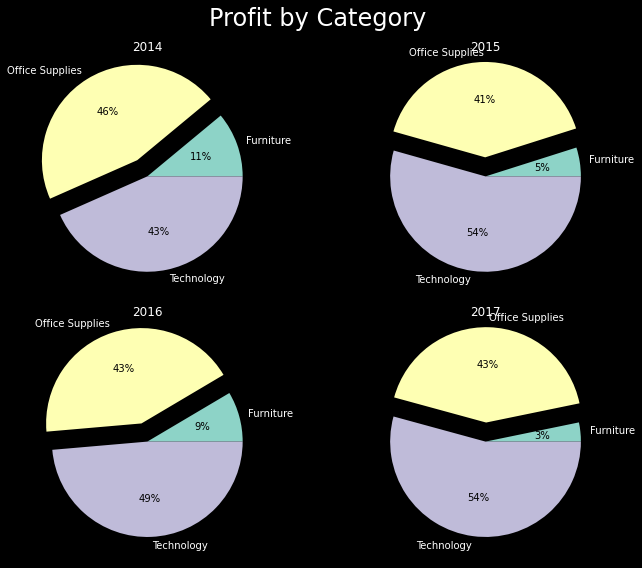

In [55]:
fig, [[ax1, ax2],[ax3,ax4]] = plt.subplots(2, 2, figsize=(10,8))

list_of_axes = [ax1,ax2,ax3,ax4]
year = [2014,2015,2016,2017]
category = ['Furniture','Office Supplies','Technology']
i = 0

for ax in list_of_axes:
    df_year_cat_pie = df_year_cat.loc[year[i]]
    x = df_year_cat_pie['Profit']
    myexplode = [0, 0.2, 0]
    _, _, autotexts = ax.pie(x,labels=category,explode=myexplode,autopct='%1.0f%%')
    for autotext in autotexts:
        autotext.set_color('black')
    ax.title.set_text(year[i])
    i = i+1

fig.suptitle('Profit by Category', fontsize=24)

fig.tight_layout()

##### By Year & Sub-Category

In [21]:
df_year_subcat = df.groupby(['Year','Sub-Category']).sum().drop(columns=['Month','Discount'])
df_year_subcat['Year-Sales'] = df_year_subcat.groupby(level=0)['Sales'].transform(np.sum)
df_year_subcat['Year-Quantity'] = df_year_subcat.groupby(level=0)['Quantity'].transform(np.sum)
df_year_subcat['Year-Profit'] = df_year_subcat.groupby(level=0)['Profit'].transform(np.sum)
df_year_subcat.insert(3,'PctSalesOfYear',(df_year_subcat['Sales']/df_year_subcat['Year-Sales']))
df_year_subcat.insert(4,'PctQtyOfYear',(df_year_subcat['Quantity']/df_year_subcat['Year-Quantity']))
df_year_subcat.insert(5,'PctProfitOfYear',(df_year_subcat['Profit']/df_year_subcat['Year-Profit']))

In [53]:
df['Sub-Category'].value_counts().index

Index(['Binders', 'Paper', 'Furnishings', 'Phones', 'Storage', 'Art',
       'Accessories', 'Chairs', 'Appliances', 'Labels', 'Tables', 'Envelopes',
       'Bookcases', 'Fasteners', 'Supplies', 'Machines', 'Copiers'],
      dtype='object')

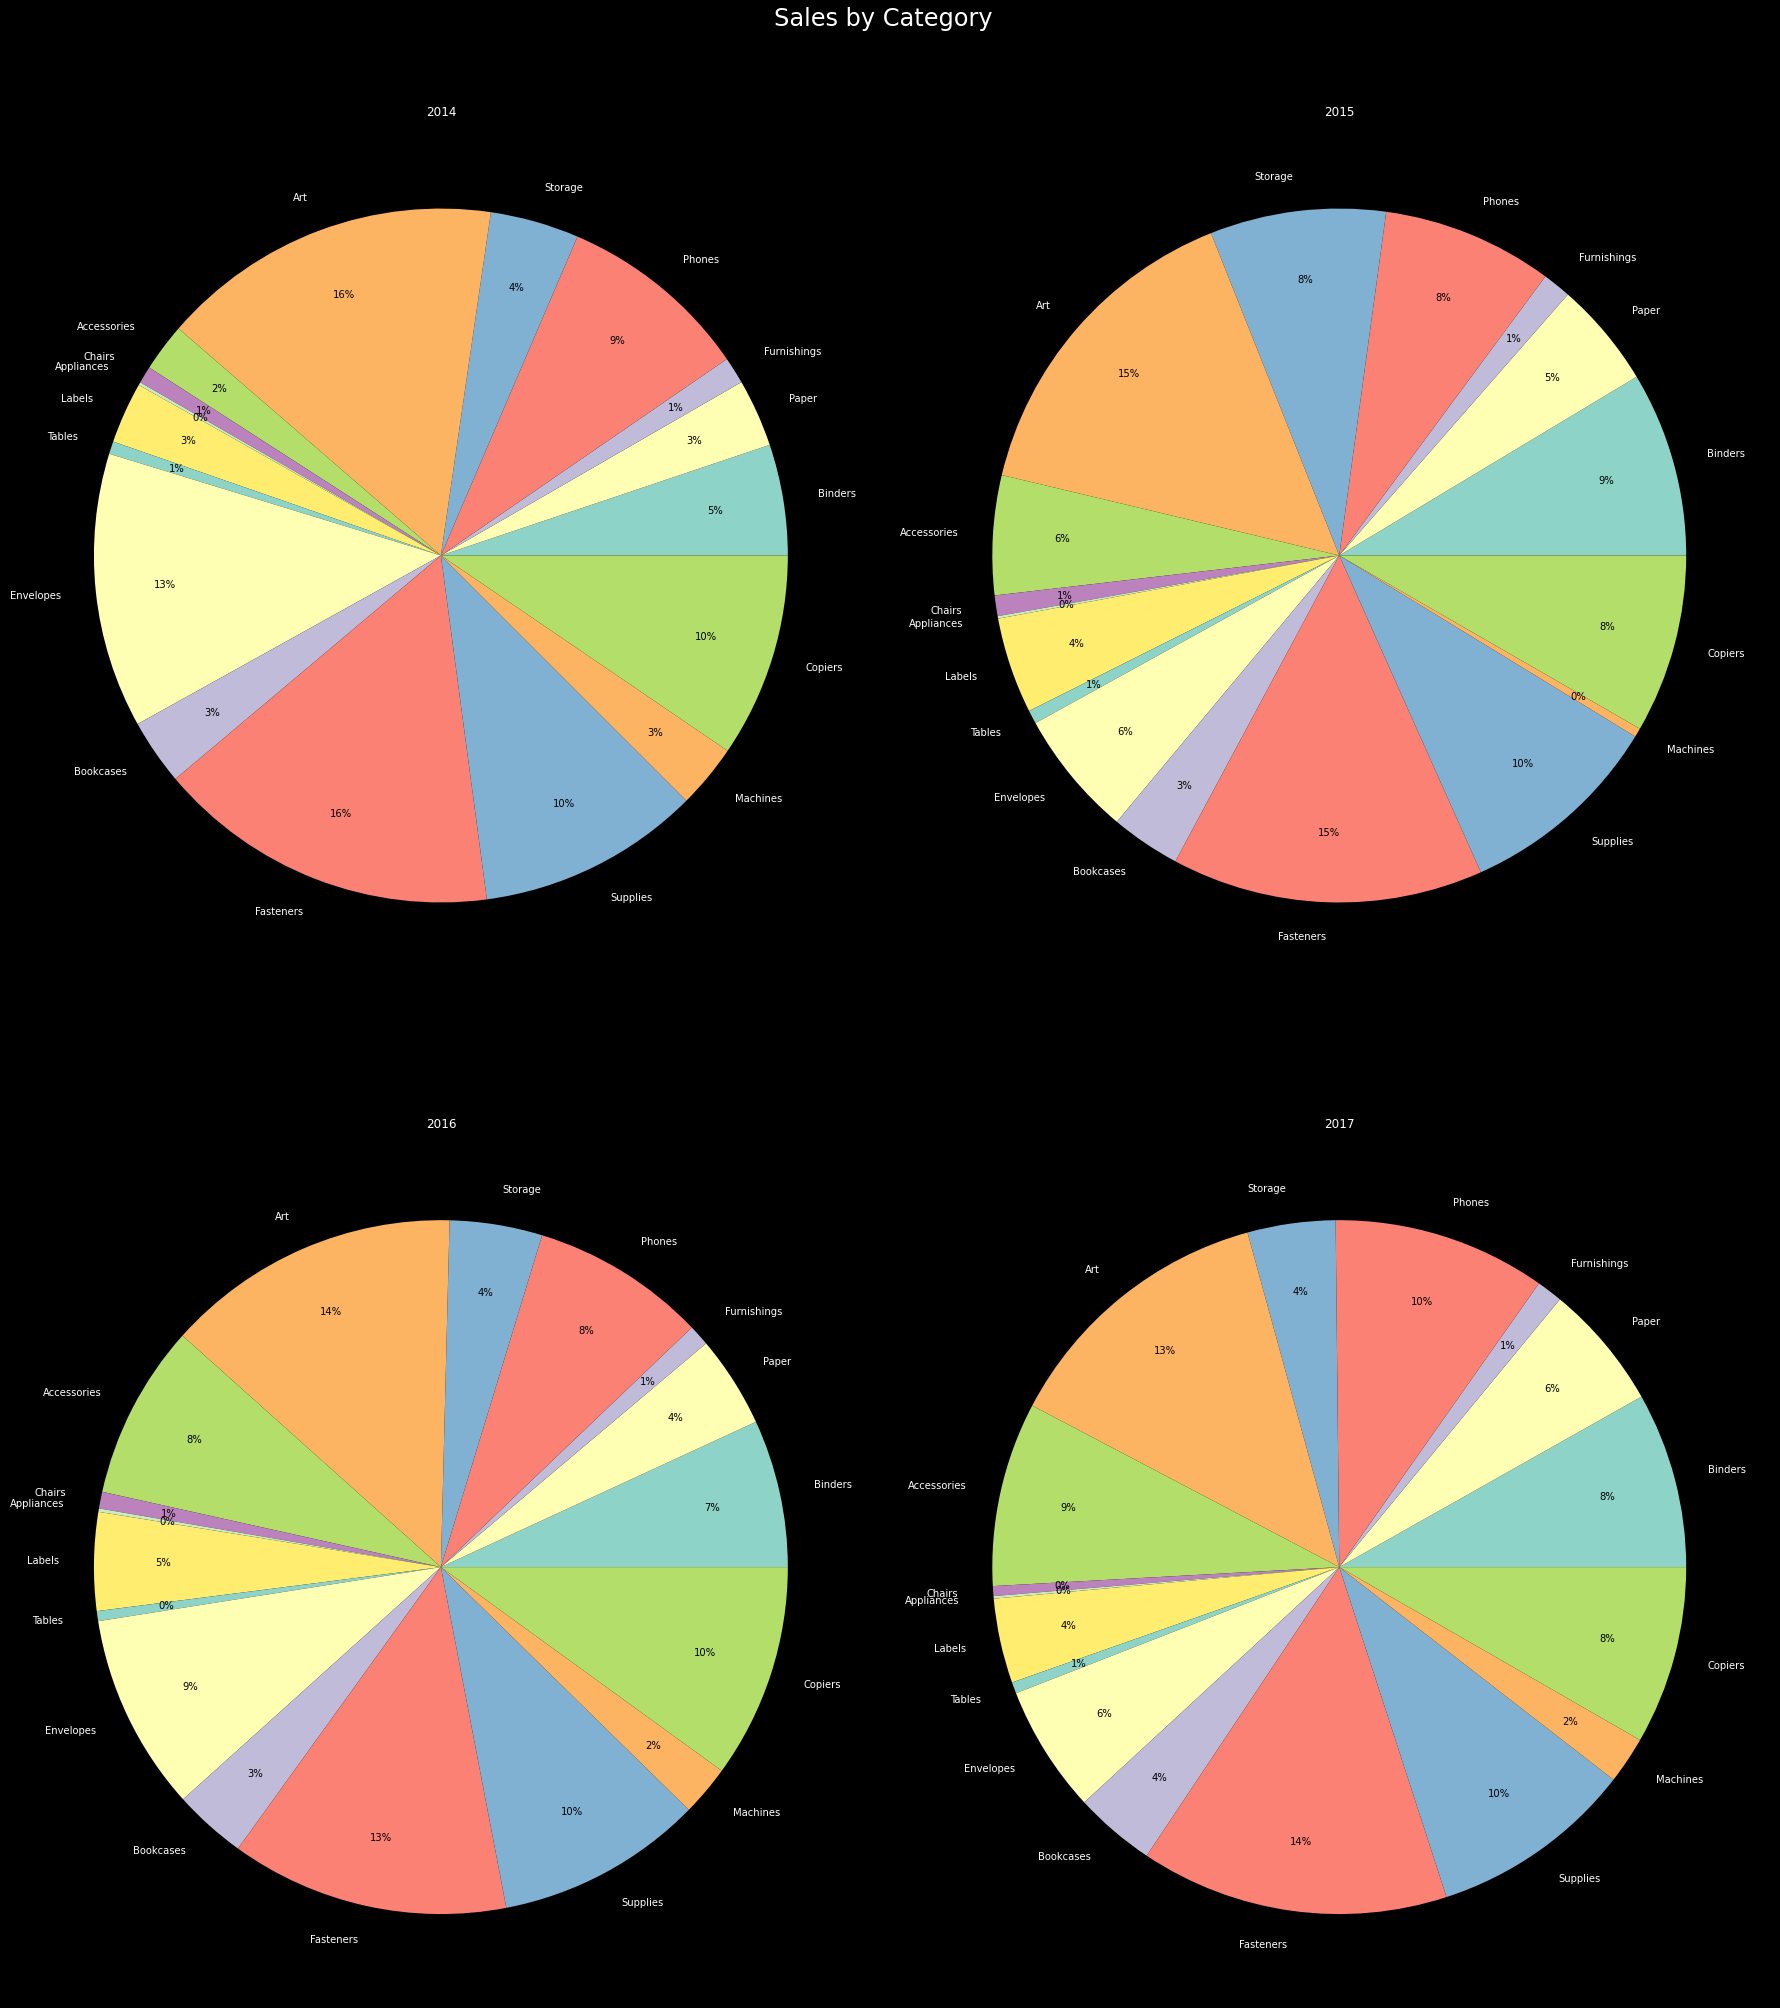

In [68]:
fig, [[ax1, ax2],[ax3,ax4]] = plt.subplots(2, 2, figsize=(25,30))

list_of_axes = [ax1,ax2,ax3,ax4]
year = [2014,2015,2016,2017]
category = ['Binders', 'Paper', 'Furnishings', 'Phones', 'Storage', 'Art',
       'Accessories', 'Chairs', 'Appliances', 'Labels', 'Tables', 'Envelopes',
       'Bookcases', 'Fasteners', 'Supplies', 'Machines', 'Copiers']
i = 0

for ax in list_of_axes:
    df_year_subcat_pie = df_year_subcat.loc[year[i]]
    x = df_year_subcat_pie['Sales']
    #myexplode = [0.2, 0, 0]
    _, _, autotexts = ax.pie(x,labels=category,autopct='%1.0f%%',pctdistance=.8)
    for autotext in autotexts:
        autotext.set_color('black')
    ax.title.set_text(year[i])
    i = i+1

fig.suptitle('Sales by Category', fontsize=24)
fig.tight_layout()

## 2. Increase in 2017 Sales

##### Setup

In [13]:
plt.style.use('dark_background')

In [14]:
df_overall_sales = df.groupby(['Year','Month']).agg('sum').reset_index()
df_overall_sales['Date'] = df_overall_sales['Month'].map(str)+ '-' +df_overall_sales['Year'].map(str)
df_overall_sales['Date'] = pd.to_datetime(df_overall_sales['Date'], format='%m-%Y')#.dt.strftime('%m-%Y')
df_overall_sales.head(10)

,Year,Month,Sales,Quantity,Discount,Profit,Date
0,2014,1,14236.8950,284,10.00,2450.1907,2014-01-01
1,2014,2,4519.8920,159,8.10,862.3084,2014-02-01
2,2014,3,55691.0090,585,26.30,498.7299,2014-03-01
3,2014,4,28295.3450,536,14.85,3488.8352,2014-04-01
4,2014,5,23648.2870,466,18.95,2738.7096,2014-05-01
5,2014,6,34595.1276,521,23.22,4976.5244,2014-06-01
6,2014,7,33946.3930,550,24.55,-841.4826,2014-07-01
7,2014,8,27909.4685,609,20.05,5318.1050,2014-08-01
8,2014,9,81777.3508,1000,42.87,8328.0994,2014-09-01
9,2014,10,31453.3930,573,25.45,3448.2573,2014-10-01


##### Year to Year data

In [15]:
df_year_sum = df.groupby('Year').sum()
df_year_sum

,Sales,Quantity,Discount,Profit,Month
Year,,,,,
2014,484247.4981,7581,315.46,49543.9741,15663
2015,470532.5090,7979,327.09,61618.6037,16703
2016,609205.5980,9837,400.32,81795.1743,20079
2017,733215.2552,12476,518.22,93439.2696,25605


##### Overall Sales Over Time

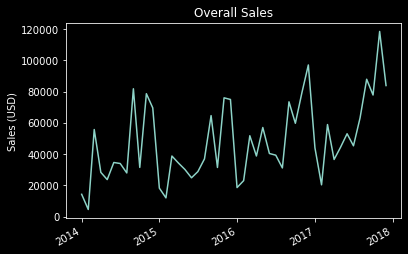

In [16]:
fig, ax = plt.subplots()

plt.plot(df_overall_sales['Date'], df_overall_sales['Sales'])
plt.title('Overall Sales')
plt.ylabel('Sales (USD)')
fig.autofmt_xdate()

plt.gca().xaxis.set_major_locator(mdates.YearLocator(1,month=1,day=1))

In [17]:
df_overall_sales2017 = df_overall_sales[(df_overall_sales['Date']>'2016-12-31')]

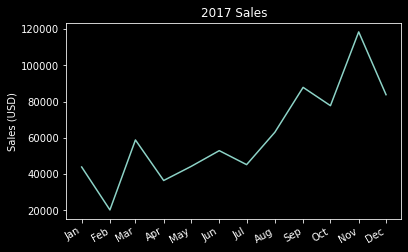

In [18]:
fig, ax = plt.subplots()

plt.plot(df_overall_sales2017['Date'], df_overall_sales2017['Sales'])
plt.title('2017 Sales')
plt.ylabel('Sales (USD)')

fmt_month = mdates.MonthLocator()
ax.xaxis.set_major_locator(fmt_month)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))

fig.autofmt_xdate()